https://github.com/0liu/ISLR/blob/master/Chapter%2010%20Unsupervised%20Learning.ipynb

### data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import scipy as sp
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from scipy.cluster import hierarchy

# from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use("ggplot")

#### USArrests

In [3]:
usarrests = pd.read_csv("/content/drive/My Drive/ISLR/data/USArrests.csv")
usarrests.set_index(usarrests.columns[0], inplace = True)
usarrests.index.name = None

In [4]:
usarrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
usarrests.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [6]:
usarrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

R에서도 그랬지만, variance를 보고 standardization의 필요성을 느꼈다.

In [7]:
X = pd.DataFrame(scale(usarrests), index = usarrests.index, columns = usarrests.columns)
X.mean()

Murder     -8.437695e-17
Assault     1.298961e-16
UrbanPop   -4.263256e-16
Rape        8.326673e-16
dtype: float64

In [8]:
X.var()

Murder      1.020408
Assault     1.020408
UrbanPop    1.020408
Rape        1.020408
dtype: float64

#### NCI60

In [9]:
nci60 = pd.read_csv("/content/drive/My Drive/ISLR/data/NCI60.csv")
nci60_data = nci60.set_index(nci60.columns[0])
nci60_data.index.name = None
nci60_labs = pd.DataFrame(nci60_data.index)

NCI60_data의 index가 labs면 굳이 붙일 필욘 없었겠는데?

In [10]:
nci60_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,6791,6792,6793,6794,6795,6796,6797,6798,6799,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809,6810,6811,6812,6813,6814,6815,6816,6817,6818,6819,6820,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
CNS,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,-0.650000,-0.940000,0.310000,0.01501,-0.080000,-2.37,-0.540000,-0.615000,0.000000,-0.519990,-0.370000,-0.290000,-0.174990,0.070000,-0.040000,0.025,-0.740000,-0.479990,-0.450000,-0.930000,0.160000,-0.550000,-0.550010,0.055000,-0.370000,-0.165000,0.210000,0.470000,0.000000,-2.602085e-18,...,0.240000,0.420000,0.100000,0.015000,0.000000,-0.204980,0.185020,0.460000,0.009980,-0.020000,-0.095000,0.210020,0.030000,0.190000,-0.130000,0.124990,0.150000,0.000000,0.375029,0.475000,0.120000,0.590000,0.335000,7.800000e-01,0.410000,-0.630000,1.215000,0.192500,0.000000,-0.820010,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
CNS,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,-0.310039,-0.720039,-0.010039,0.00000,-0.570039,0.00,-0.470039,-0.355039,0.004981,-0.480029,-0.140039,-0.090039,0.004971,-0.220039,-0.370039,0.000,-0.320039,0.159971,0.179961,-0.320039,-0.440039,0.349961,0.449951,0.104961,0.489961,0.204961,-0.050039,-0.010039,0.269961,1.996101e-02,...,0.799961,0.269961,0.479961,-0.245039,0.279961,0.014981,-0.075019,0.609961,0.099941,0.629961,0.474961,0.419981,-0.170039,-0.090039,-0.170039,0.494951,-0.120039,0.679961,-0.215010,0.484961,-0.130039,0.029961,0.154961,4.399610e-01,-0.320039,0.009961,0.684961,0.572461,0.629961,-0.400049,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
CNS,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,0.410000,0.130000,-0.350000,0.00000,0.000000,0.00,-0.800000,0.000000,-0.004981,0.000000,-0.140000,0.050000,-0.064990,-0.060000,0.290000,0.715,-0.070000,-0.089990,-0.310000,0.580000,-0.480000,0.230000,-0.040010,-0.935000,-0.750000,-0.385000,-0.340000,0.120000,-0.470000,1.700000e-01,...,0.010000,-0.190000,0.420000,0.145000,0.000000,0.065019,-0.644981,-0.070000,0.000000,0.370000,0.565000,0.460019,0.320000,0.100000,0.060000,0.124990,0.270000,0.480000,0.895029,0.225000,0.300000,0.680000,0.715000,5.300000e-01,0.000000,0.120000,0.295000,0.752500,0.380000,0.000000,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
RENAL,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,-0.010000,-0.120000,-0.210000,0.00000,0.610000,-1.02,-0.470000,0.000000,-0.764981,0.000000,-0.310000,-0.620000,-0.284990,-0.540000,-0.520000,-0.135,-0.890000,-0.269990,-0.840000,-0.230000,0.320000,0.000000,0.109990,0.455000,-0.340000,-0.895000,-1.080000,-0.430000,-0.030000,-1.300000e-01,...,-0.400000,-0.470000,0.220000,-0.495000,-0.370000,-0.474981,-0.834981,-0.370000,0.289980,-0.210000,-0.785000,-0.199981,0.060000,0.400000,-0.160000,0.124990,0.380000,0.750000,1.525029,0.695000,0.570000,0.200000,0.185000,-6.938894e-18,0.000000,-0.080000,-0.875000,-0.587500,-0.570000,0.439990,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
BREAST,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,0.685000,0.605000,0.355000,1.22001,2.425000,0.00,-0.315000,0.310000,-0.519981,-0.074990,-0.865000,-0.455000,-0.499990,-0.245000,-0.235000,-0.330,0.000000,0.015010,-0.105000,-0.225000,-0.105000,-0.275000,-0.575010,-0.450000,-0.465000,-0.390000,-0.995000,-0.355000,0.000000,-4.750000e-01,...,-0.175000,0.015000,1.465000,-0.060000,-0.805000,-0.719981,-2.069981,-0.695000,1.464980,-0.055000,0.120000,0.095020,-0.635000,-0.195000,-0.115000,-0.190010,0.045000,-0.365000,0.150029,-0.030000,0.085000,0.165000

아니, R 데이터랑은 같은데.. 저기가 데이터가 이상한 건가, 흠.

In [11]:
nci60_labs.head()

,0
0,CNS
1,CNS
2,CNS
3,RENAL
4,BREAST


In [12]:
nci60_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, CNS to MELANOMA
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB


In [13]:
nci60_labs[0].value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7D-repro    1
MCF7A-repro    1
UNKNOWN        1
Name: 0, dtype: int64

### **PCA: Principal Component Analysis**
- no, PC. Regression

In [14]:
pca = PCA()
usarrests_loadings = pd.DataFrame(pca.fit(X).components_.T, index = usarrests.columns,
                                  columns = ["PC1", "PC2", "PC3", "PC4"])
usarrests_loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [15]:
usarrests_score = pd.DataFrame(pca.fit_transform(X), index = X.index,
                               columns = ["PC1", "PC2", "PC3", "PC4"])
usarrests_score.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [16]:
usarrests_score_stdvar = pd.DataFrame([np.sqrt(pca.explained_variance_), pca.explained_variance_, pca.explained_variance_ratio_],
                                      index = ["STDEV", "VAR", "Explained VAR Ratio"],
                                      columns = ["PC1", "PC2", "PC3", "PC4"])
usarrests_score_stdvar

,PC1,PC2,PC3,PC4
STDEV,1.590867,1.004970,0.603191,0.420677
VAR,2.530859,1.009964,0.363840,0.176969
Explained VAR Ratio,0.620060,0.247441,0.089141,0.043358


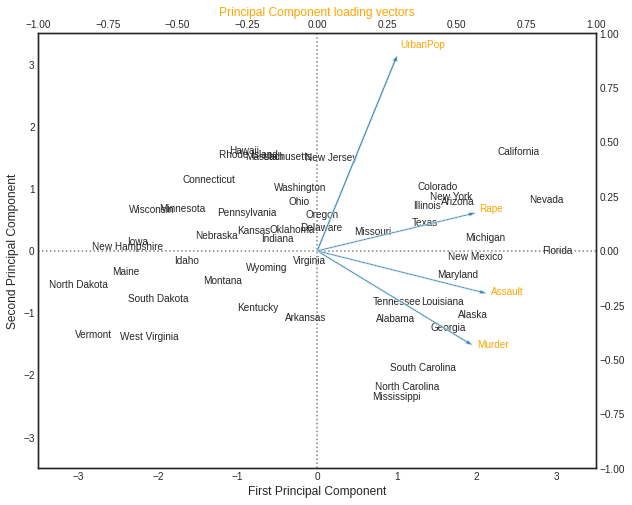

In [17]:
mpl.style.use("seaborn-white")
fig, ax1 = plt.subplots(figsize = (10,8))

# ax1: components 1 and 2
for i in usarrests_score.index:
  ax1.annotate(i, (usarrests_score.PC1.loc[i], -usarrests_score.PC2.loc[i]), ha = "center")

# ax1: setting line
ax1.set_xlim(-3.5, 3.5)
ax1.set_ylim(-3.5, 3.5)
ax1.set_xlabel("First Principal Component")
ax1.set_ylabel("Second Principal Component")
ax1.hlines(0, -3.5, 3.5, linestyles = "dotted", colors = "grey")
ax1.vlines(0, -3.5, 3.5, linestyles = "dotted", colors = "grey")

# ax1 copy? return이 axes instance인데 일부를 건드리려고 하는 것 같기도 하고, 아닌 것 같기도 하고.
ax2 = ax1.twinx().twiny()

# small offset parameter to separate arrow tip and text
a = 1.07
for i in usarrests_loadings[["PC1", "PC2"]].index:
  ax2.annotate(i, (usarrests_loadings.PC1.loc[i]*a, -usarrests_loadings.PC2.loc[i]*a), color = "orange")

for i in range(0, 4):
  ax2.arrow(0, 0, usarrests_loadings.PC1[i], -usarrests_loadings.PC2[i], width = 0.006)

ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.set_xlabel("Principal Component loading vectors", color = "orange")
ax2.tick_params(axis = 'y', colors = "orange")

plt.show()  # 안 써도 되긴 하는데, 혹시나 안 나올 수 있어서...

scree plot???

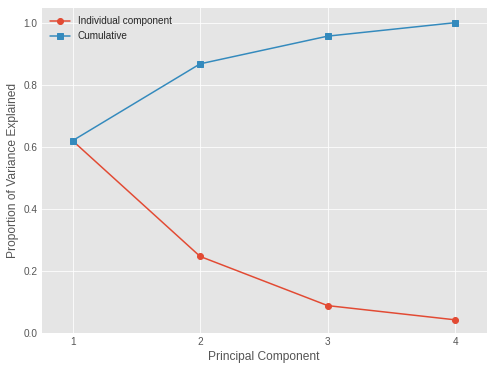

In [18]:
mpl.style.use("ggplot")
plt.figure(figsize = (8, 6))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, "-o", label = "Individual component")
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), "-s", label = "Cumulative")

plt.xlim(0.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks([1,2,3,4])
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.legend(loc = 2)

### **K-Means Clustering**

In [19]:
np.random.seed(2)
X = np.random.standard_normal((50, 2))
X[:25, 0] = X[:25, 0] + 3
X[:25, 1] = X[:25, 1] - 4

K = 2

In [20]:
km1 = KMeans(n_clusters = 2, n_init = 20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int32)

K = 3

In [22]:
np.random.seed(4)
km2 = KMeans(n_clusters = 3, n_init = 20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
pd.Series(km2.labels_).value_counts()

2    21
1    20
0     9
dtype: int64

In [24]:
km2.inertia_

68.97379200939726

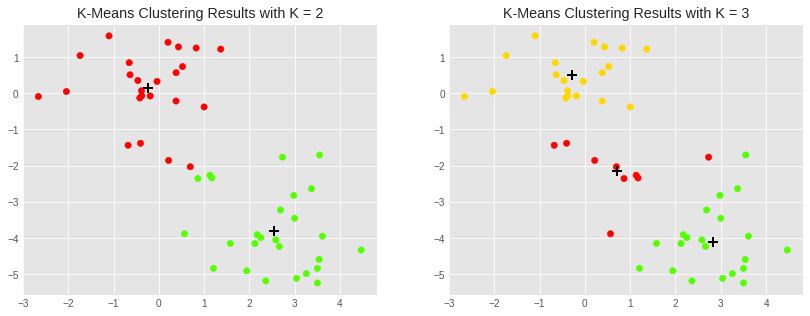

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 5))

ax1.scatter(X[:, 0], X[:, 1], s = 40, c = km1.labels_, cmap = plt.cm.prism)
ax1.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], marker = '+', s = 100, c = 'k', linewidth = 2)
ax1.set_title("K-Means Clustering Results with K = 2")

ax2.scatter(X[:, 0], X[:, 1], s = 40, c = km2.labels_, cmap = plt.cm.prism)
ax2.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], marker = '+', s = 100, c = 'k', linewidth = 2)
ax2.set_title("K-Means Clustering Results with K = 3")

plt.show()

### **Hierarchical Clustering**
- Linkage: Complete, Average, Single and so on

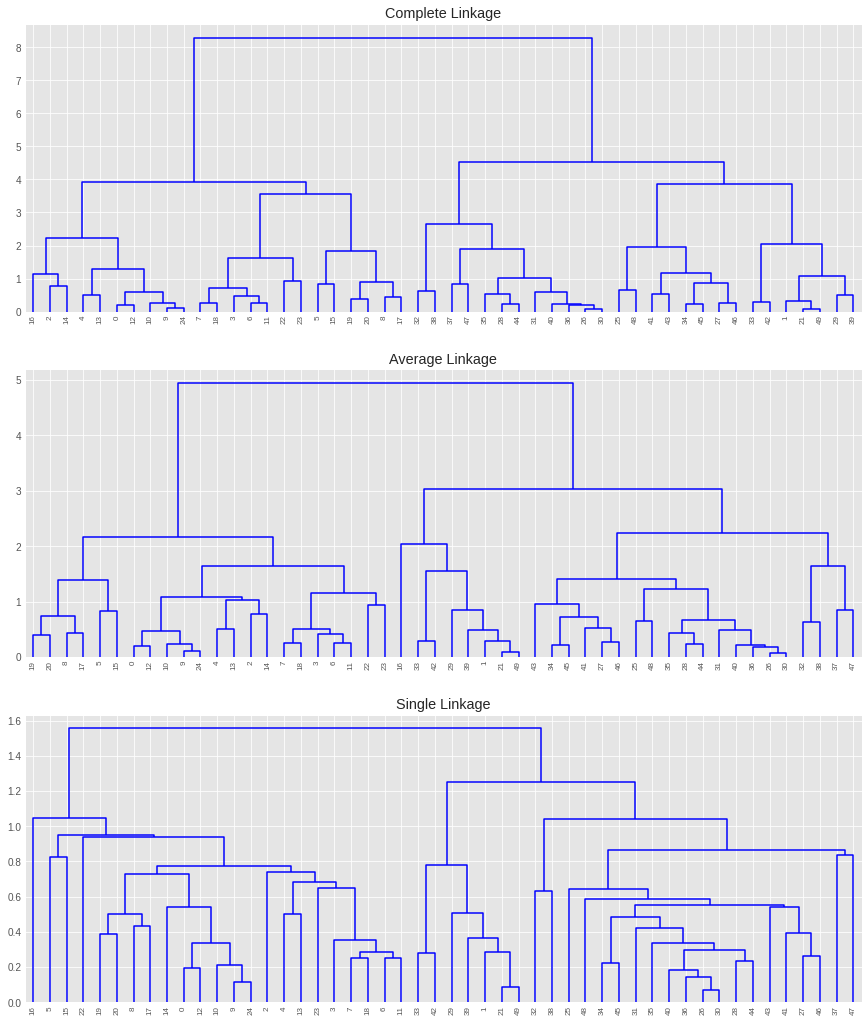

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (15, 18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)],
                                ["c1", "c2", "c3"], [ax1, ax2, ax3]):
  cluster = hierarchy.dendrogram(linkage, ax = ax, color_threshold = 0)

ax1.set_title("Complete Linkage")
ax2.set_title("Average Linkage")
ax3.set_title("Single Linkage")

plt.show()

### NCI60 Data Example

#### PCA on the data

In [27]:
pca = PCA()
nci60_pca = pd.DataFrame(pca.fit_transform(nci60_data))

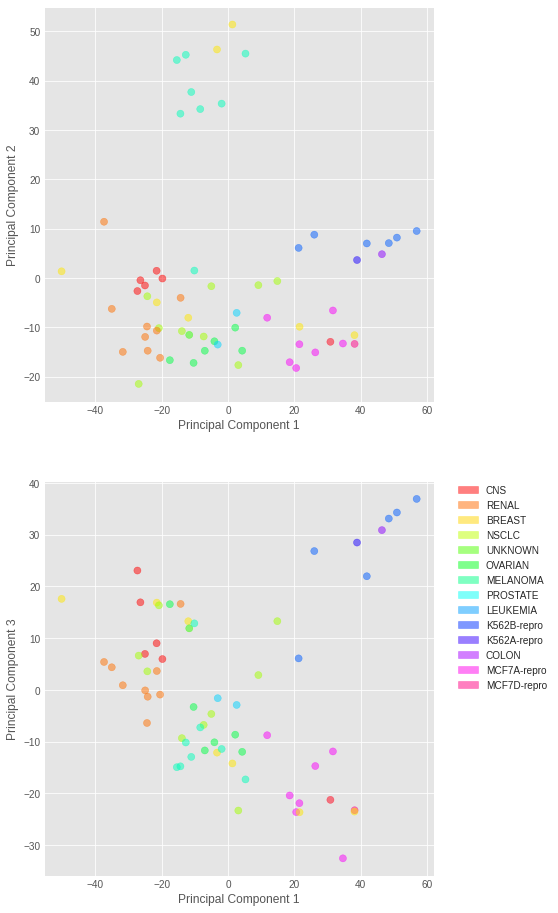

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (7, 16))

color_idx = pd.factorize(nci60_labs[0])[0]
cmap = plt.cm.hsv

ax1.scatter(nci60_pca.iloc[:, 0], nci60_pca.iloc[:, 1], c = color_idx, cmap = cmap, alpha = 0.5, s = 50)
ax1.set_ylabel("Principal Component 2")

ax2.scatter(nci60_pca.iloc[:, 0], nci60_pca.iloc[:, 2], c = color_idx, cmap = cmap, alpha = 0.5, s = 50)
ax2.set_ylabel("Principal Component 3")

handles = []
labels = pd.factorize(nci60_labs[0].unique())
norm = mpl.colors.Normalize(vmin = 0.0, vmax = 14)
for i, v in zip(labels[0], labels[1]):
  handles.append(mpl.patches.Patch(color = cmap(norm(i)), label = v, alpha = 0.5))
ax2.legend(handles = handles, bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

for ax in fig.axes:
  ax.set_xlabel("Principal Component 1")
plt.show()

원래 plt.subplots(1, 2, figsize = (15, 6))이었으나 도저히 보이지 않을 것만 같아서 그냥 바꿔버림.

In [29]:
pd.DataFrame([nci60_pca.iloc[:, :5].std(axis = 0, ddof = 0).values,
              pca.explained_variance_ratio_[:5],
              np.cumsum(pca.explained_variance_ratio_[:5])],
             index = ["Standard Deviation", "Proportion of Variance", "Cumulative Proportion"],
             columns = ["PC1", "PC2", "PC3", "PC4", "PC5"])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,24.966409,18.639027,16.599553,13.424692,12.688644
Proportion of Variance,0.148929,0.083007,0.065836,0.043060,0.038468
Cumulative Proportion,0.148929,0.231936,0.297772,0.340832,0.379300


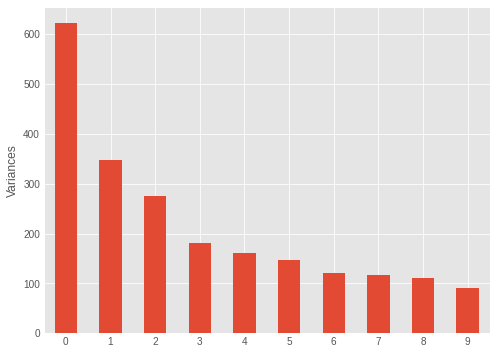

In [30]:
plt.figure(figsize = (8,6))
nci60_pca.iloc[:, :10].var(axis = 0, ddof = 0).plot(kind = "bar", rot = 0)
plt.ylabel("Variances")
plt.show()

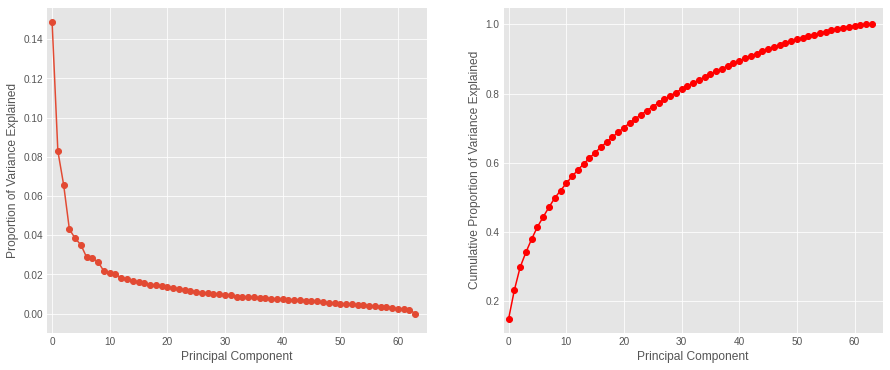

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

ax1.plot(pca.explained_variance_ratio_, "-o")
ax1.set_ylim(ymin = -0.01)
ax1.set_ylabel("Proportion of Variance Explained")

ax2.plot(np.cumsum(pca.explained_variance_ratio_), "-ro")
ax2.set_ylim(ymax = 1.05)
ax2.set_ylabel("Cumulative Proportion of Variance Explained")

for ax in fig.axes:
  ax.set_xlabel("Principal Component")
  ax.set_xlim(-1, 65)

#### Clustering

한 번에 보는 게 목적이라 시각적인(크기와 글자 인식 관련해서) 것은 사실상 포기합니다.

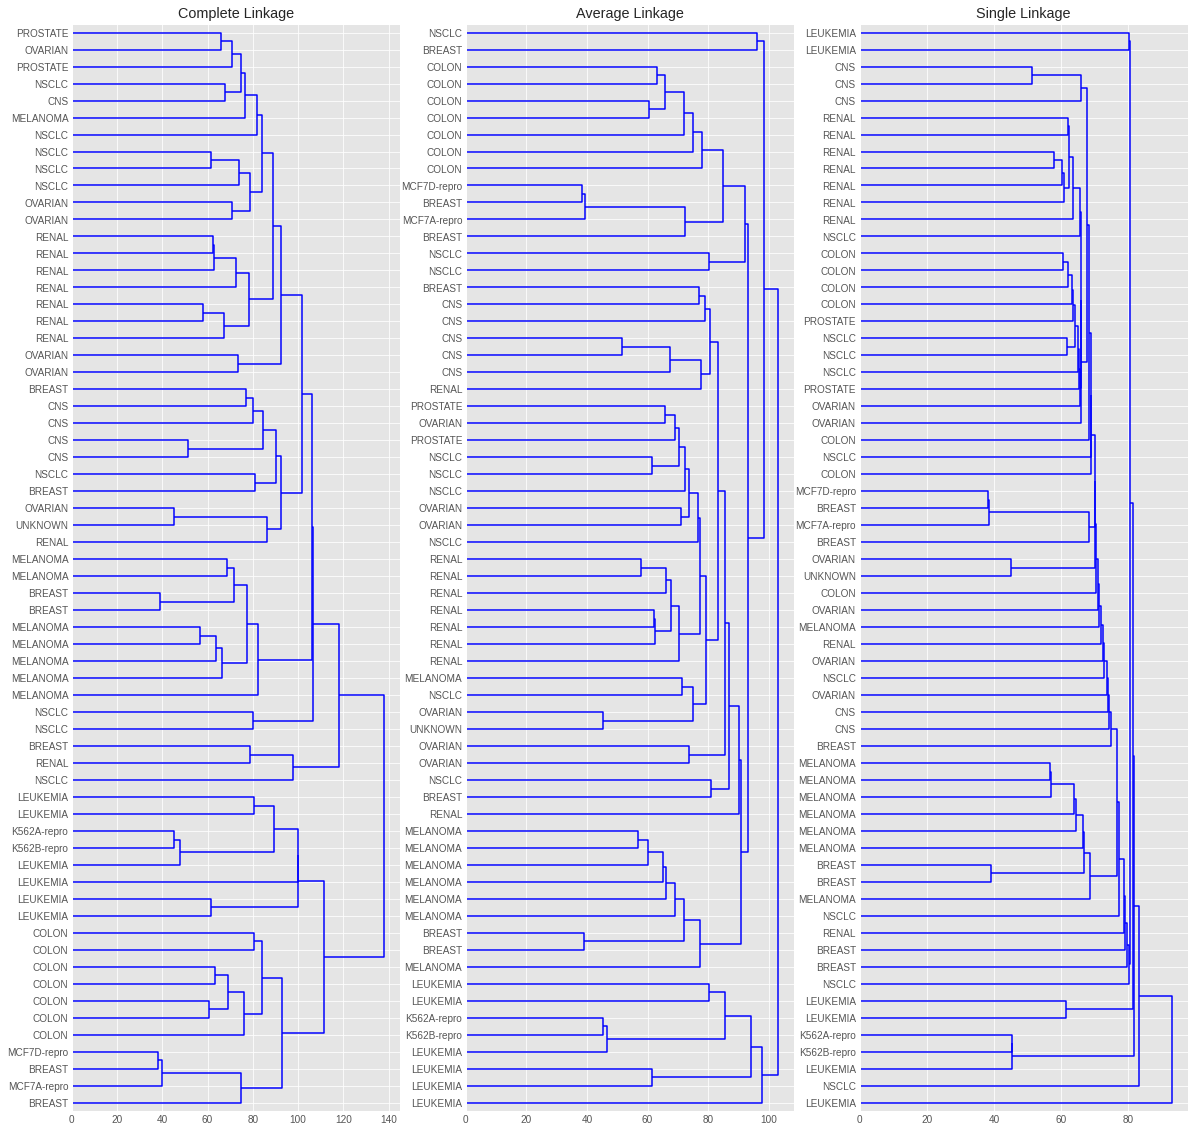

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 20))

for linkage, cluster, ax in zip([hierarchy.complete(nci60_data), hierarchy.average(nci60_data),
                                 hierarchy.single(nci60_data)],
                                ["c1", "c2", "c3"], [ax1, ax2, ax3]):
  cluster = hierarchy.dendrogram(linkage, labels = nci60_data.index, orientation = "right",
                                 color_threshold = 0, leaf_font_size = 10, ax = ax)

ax1.set_title("Complete Linkage")
ax2.set_title("Average Linkage")
ax3.set_title("Single Linkage")

plt.show()

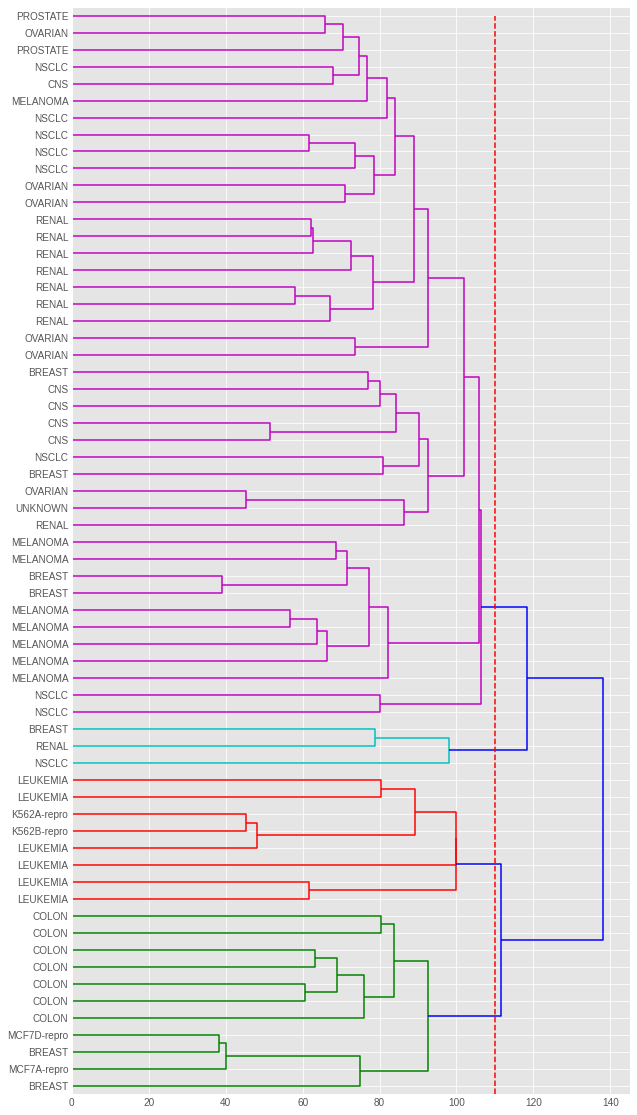

In [33]:
plt.figure(figsize = (10, 20))
cut4 = hierarchy.dendrogram(hierarchy.complete(nci60_data), labels = nci60_data.index,
                            orientation = "right", color_threshold = 110, leaf_font_size = 10)
plt.vlines(110, 0, plt.gca().yaxis.get_data_interval()[1], colors = 'r', linestyles = "dashed")
plt.show()

md에 설정된 그림 최대 크기가 정해져 있어서인지 펼치기가 안 된다.<br />
그냥 html 뜯을 수 있으면 max 값 조정만 뜯으면 될 것 같은데.

- 지금 생각나는 건 ```python```으로 써서 plot 이미지를 저장했다가 다시 불러오는 방식인데, 그러기엔 줄이 너무 길어지고, markdown의 유용성을 일부 버리게 되는 것 같아 고민 중.

##### K-Means

In [34]:
np.random.seed(2)
km_nci60 = KMeans(n_clusters = 4, n_init = 50)
km_nci60.fit(nci60_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
km_nci60.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [36]:
pd.Series(km_nci60.labels_).value_counts().sort_index()

0    29
1     9
2    19
3     7
dtype: int64

흠 확실히 다른 결과가 나오는군, 그러나 나눠진 비율을 볼 떄는 비슷.

##### Hierarchical

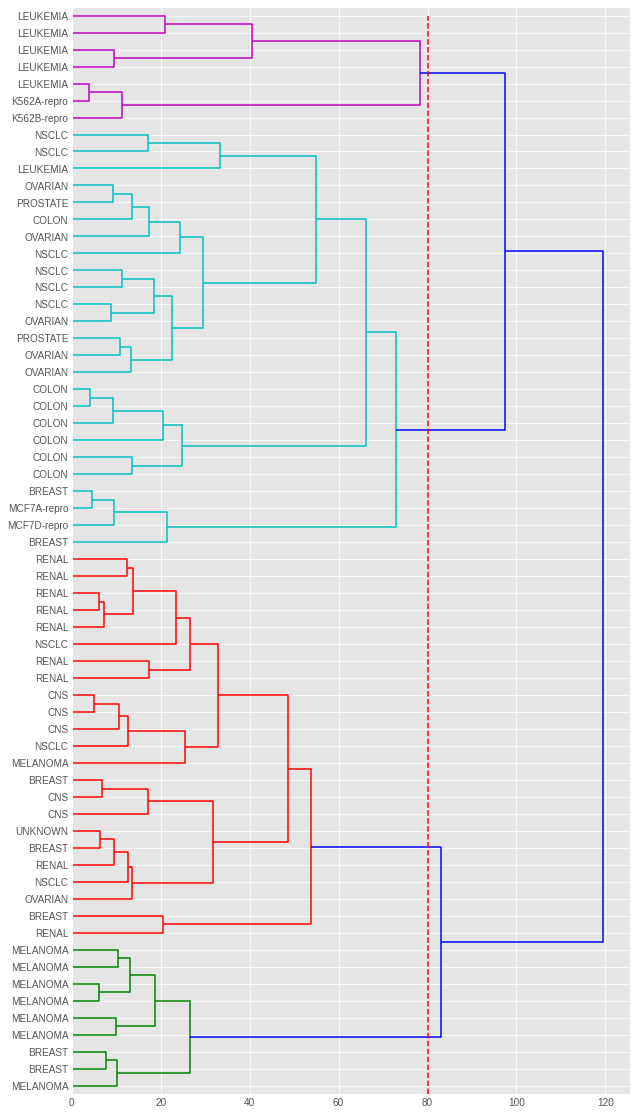

In [37]:
plt.figure(figsize = (10, 20))
pca_cluster = hierarchy.dendrogram(hierarchy.complete(nci60_pca.iloc[:, :5]),
                                   labels = nci60_labs[0].values, orientation = "right",
                                   color_threshold = 80, leaf_font_size = 10)
plt.vlines(80, 0, plt.gca().yaxis.get_data_interval()[1], colors = 'r', linestyles = "dashed")
plt.show()

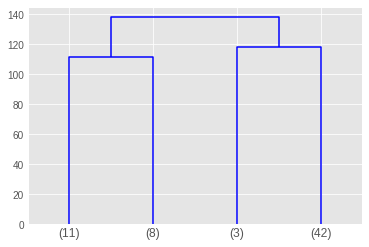

In [38]:
hierarchy.dendrogram(hierarchy.complete(nci60_pca), truncate_mode = "lastp", p = 4,
                     show_leaf_counts = True)
plt.show()

(matplotlib module에서) plt.show() 대신 세미콜론을 통해 plot setting이 끝났음을 이야기해주는 것 같은데,<br />
안정성, 편리성 등의 이유로 plt.show()를 고집할 것임.